**Importing the Libraries**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
import time

**Import the Fashion MNIST dataset**

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Processing the data**

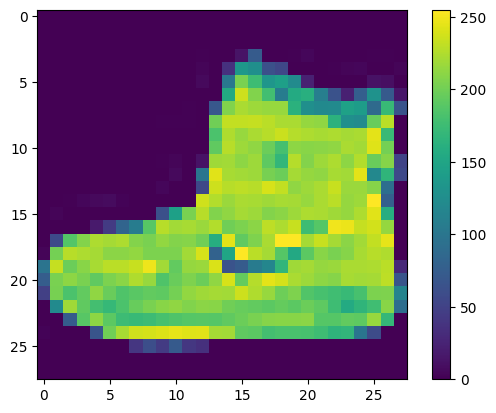

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

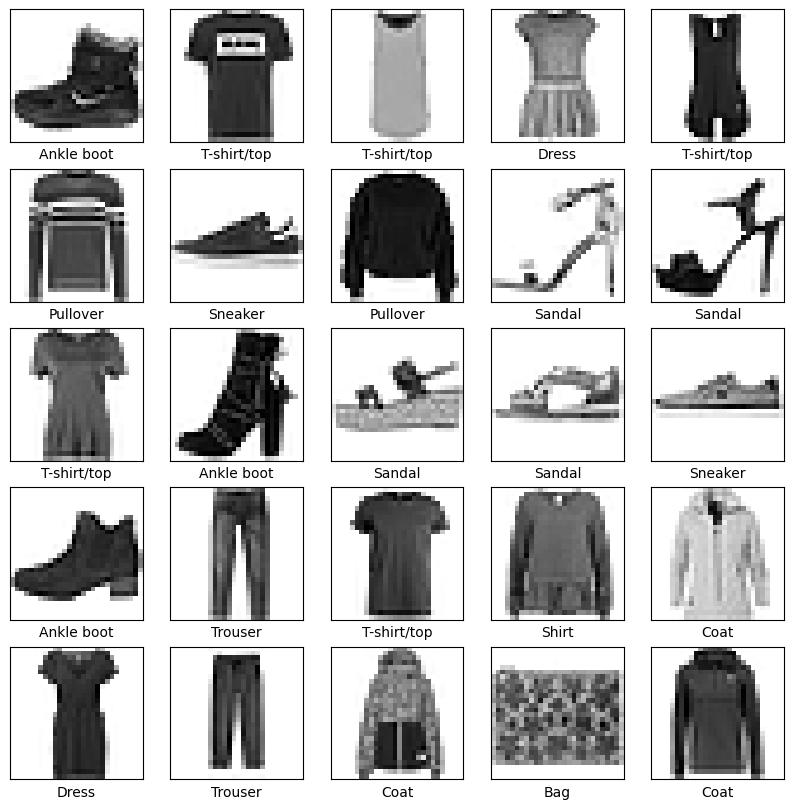

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Build the CNN Model**

In [7]:
#Create the CNN model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, 3, padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))


**Compile the model**

In [14]:
# complie the model
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
#model.compile(optimizer='adam',
 #             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  #            metrics=['accuracy'])

**Training the Model and Feed the model**

In [15]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 77s 40ms/step - loss: 0.1577 - accuracy: 0.9413
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1476 - accuracy: 0.9433
Epoch 3/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.1454 - accuracy: 0.9461
Epoch 4/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.1424 - accuracy: 0.9457
Epoch 5/10
1875/1875 [==============================] - 82s 44ms/step - loss: 0.1354 - accuracy: 0.9483
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1343 - accuracy: 0.9495
Epoch 7/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1296 - accuracy: 0.9506
Epoch 8/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1265 - accuracy: 0.9521
Epoch 9/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.1270 - accuracy: 0.9516
Epoch 10/10
1875/1875 [==============================] - 60s 32m

**Evaluate Accuracy**

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 2s - loss: 0.2308 - accuracy: 0.9279 - 2s/epoch - 8ms/step

Test accuracy: 0.9279000163078308


In [20]:
y_pred = model.predict(test_images)
#y_pred.round(2)

313/313 [==============================] - 2s 8ms/step


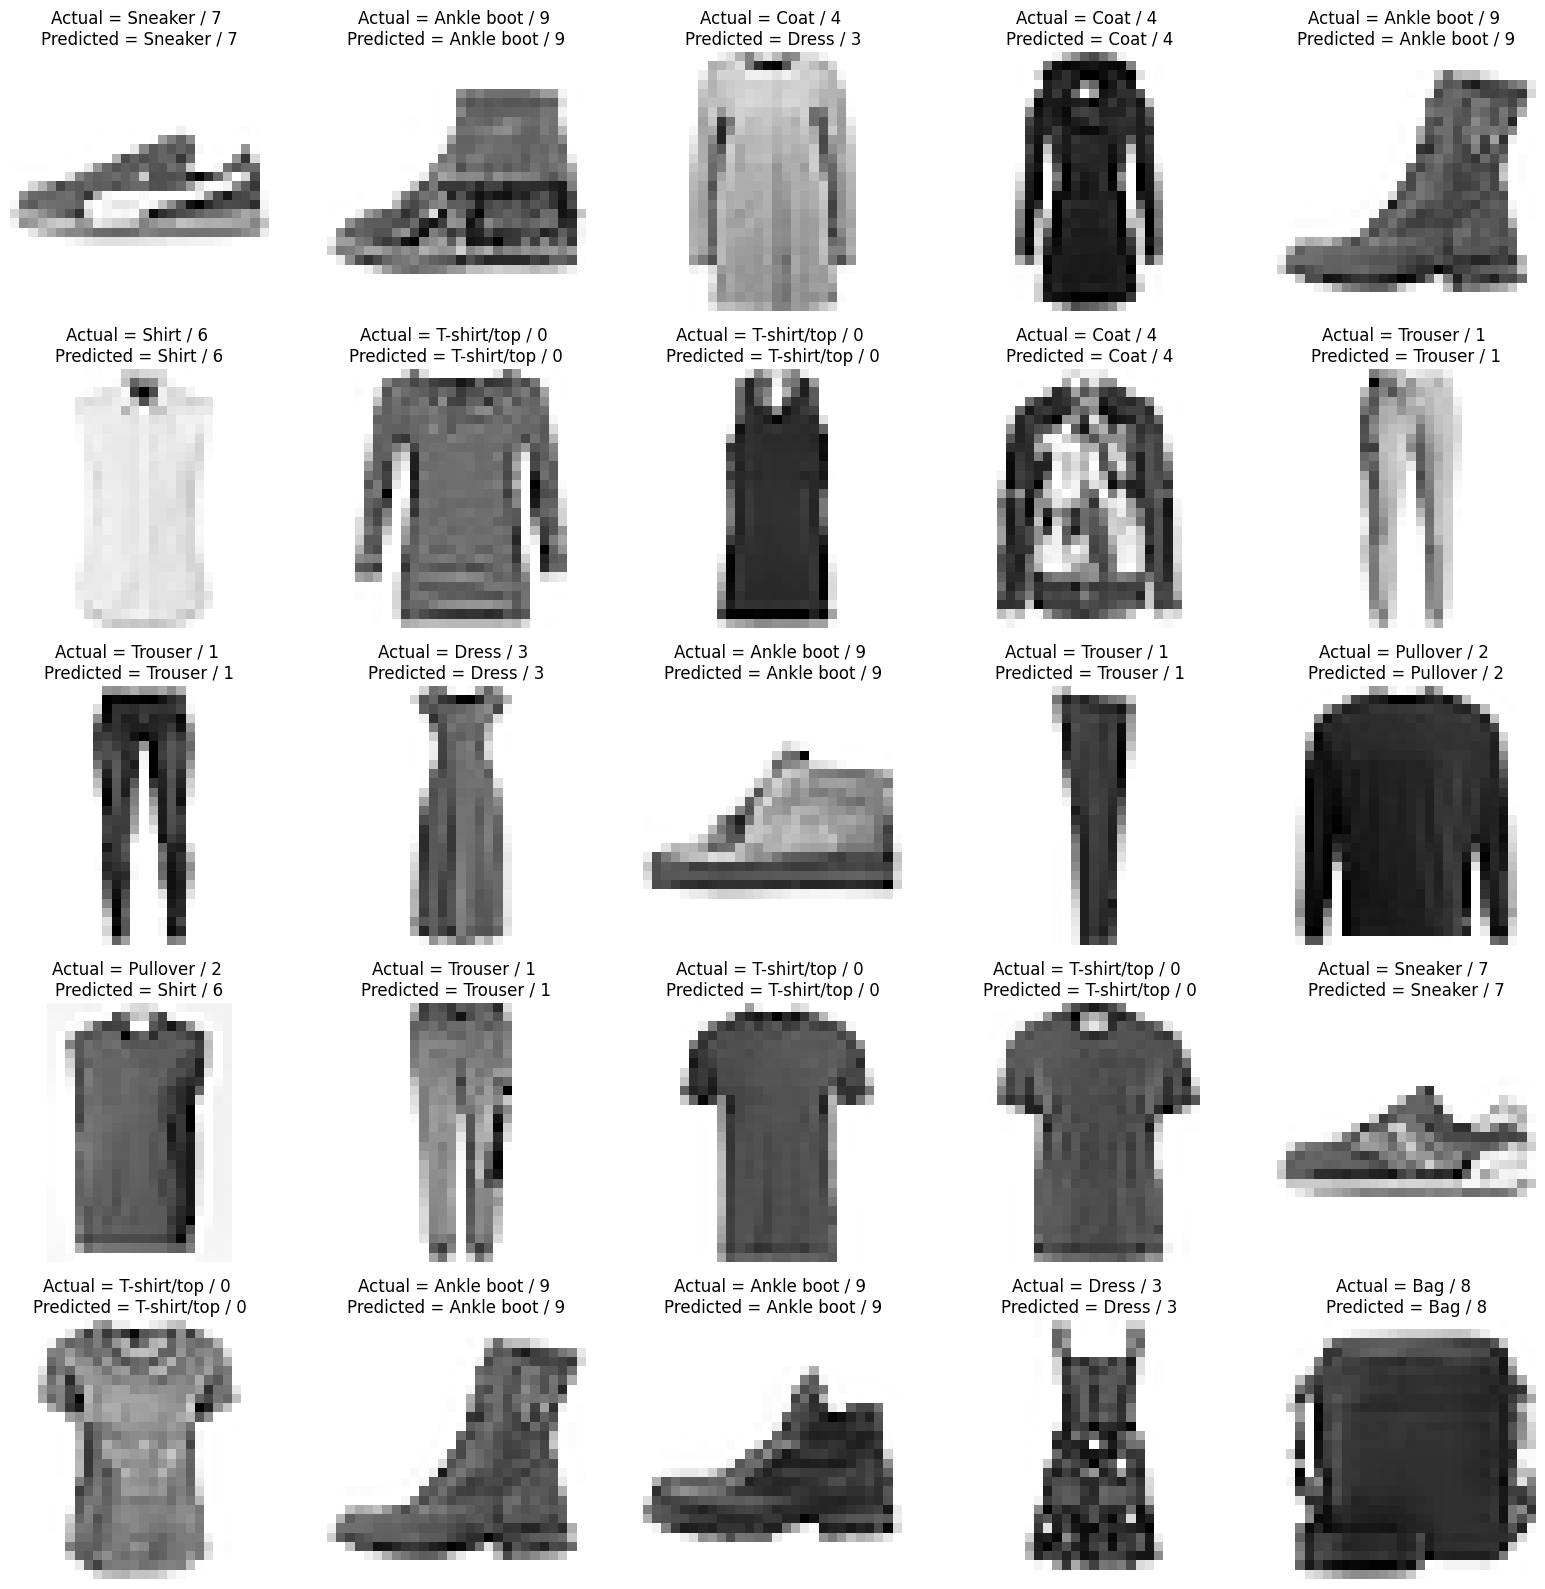

In [21]:
plt.figure(figsize=(16, 16))

j = 1
for _ in range(25):
    i = np.random.randint(0, 1000)  # Randomly select an index
    plt.subplot(5, 5, j)
    j += 1
    plt.imshow(test_images[i].reshape(28, 28), cmap='Greys')
    plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_names[test_labels[i]], test_labels[i], class_names[np.argmax(y_pred[i])], np.argmax(y_pred[i])))
    plt.axis('off')

plt.tight_layout()
plt.show()


**Make predictions**

In [23]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [26]:
predictions = probability_model.predict(test_images) #here time taken by the trained model to predict is 3ms

313/313 [==============================] - 3s 8ms/step


**Graph this to look at the full set of 10 class predictions**

In [28]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

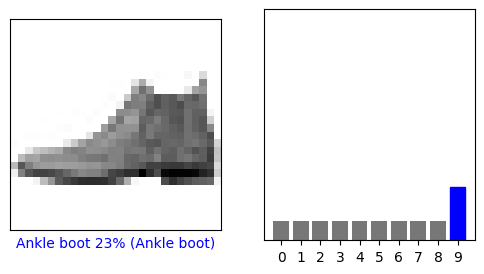

In [29]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

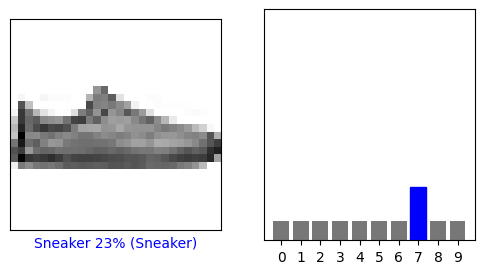

In [30]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

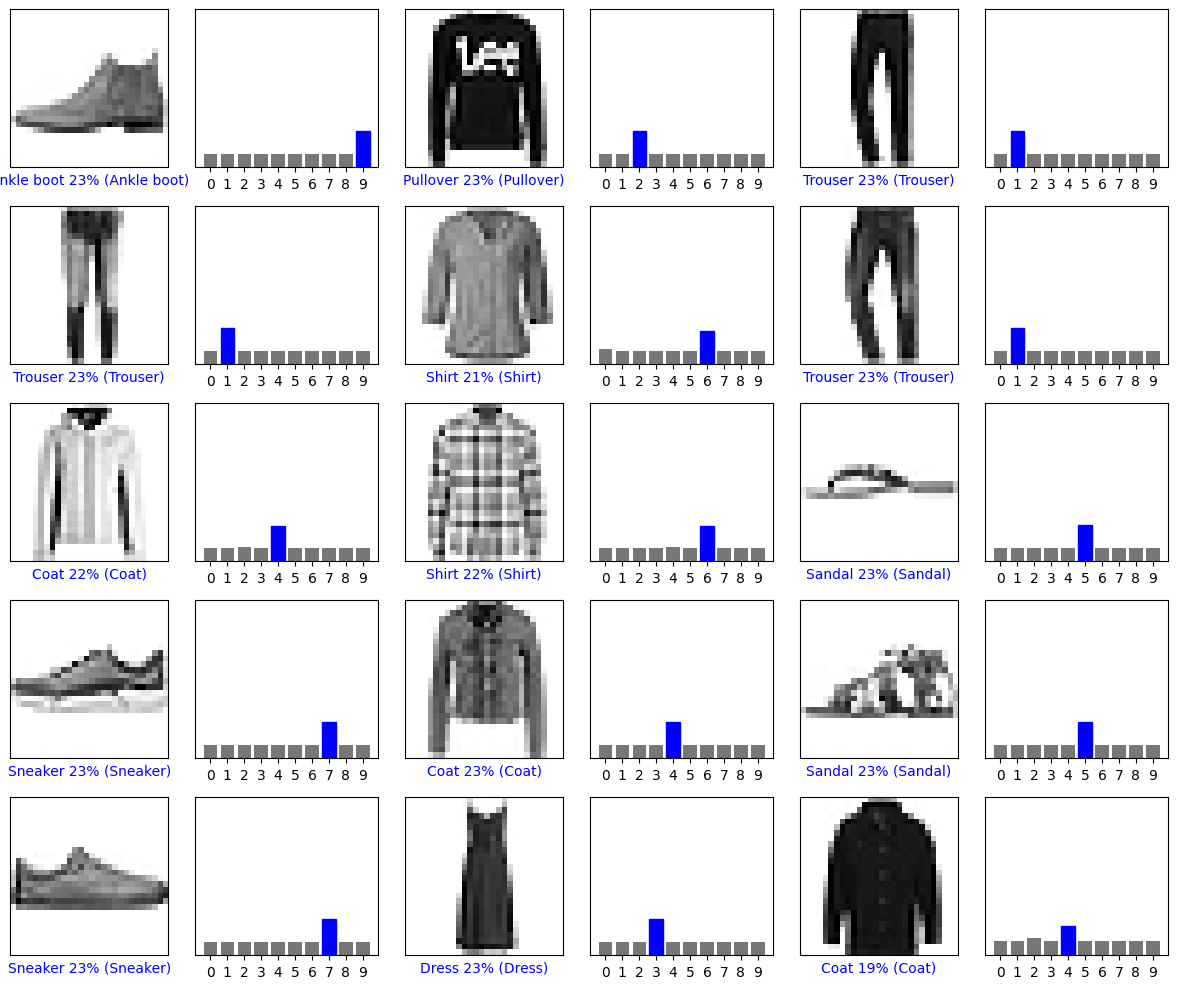

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

**Save the Model**

In [32]:
model.save('fashion_mnist_cnn_model.h5') # Save model

**Use the trained model**



In [33]:
# Load model
fashion_mnist_cnn_model = keras.models.load_model('fashion_mnist_cnn_model.h5')

**Time taken by the Trained model for Predictions**

In [34]:
##----------------------------Time Taking for predicting-------------

start=time.time()
predictions = fashion_mnist_cnn_model.predict(test_images)
stop=time.time()
print("time taken for inferencing :",stop-start)

313/313 [==============================] - 3s 8ms/step
time taken for inferencing : 2.6916234493255615


In [35]:

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

**Verify predictions**

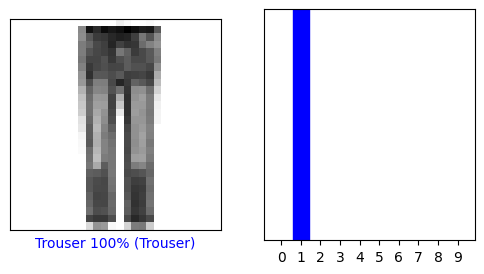

In [36]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

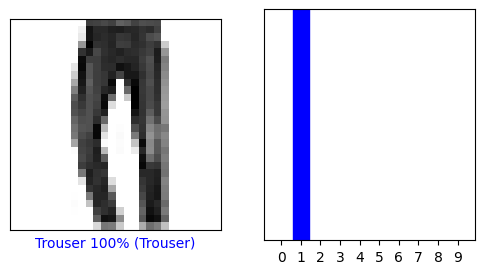

In [37]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

**Confusion Matrix**

<Axes: >

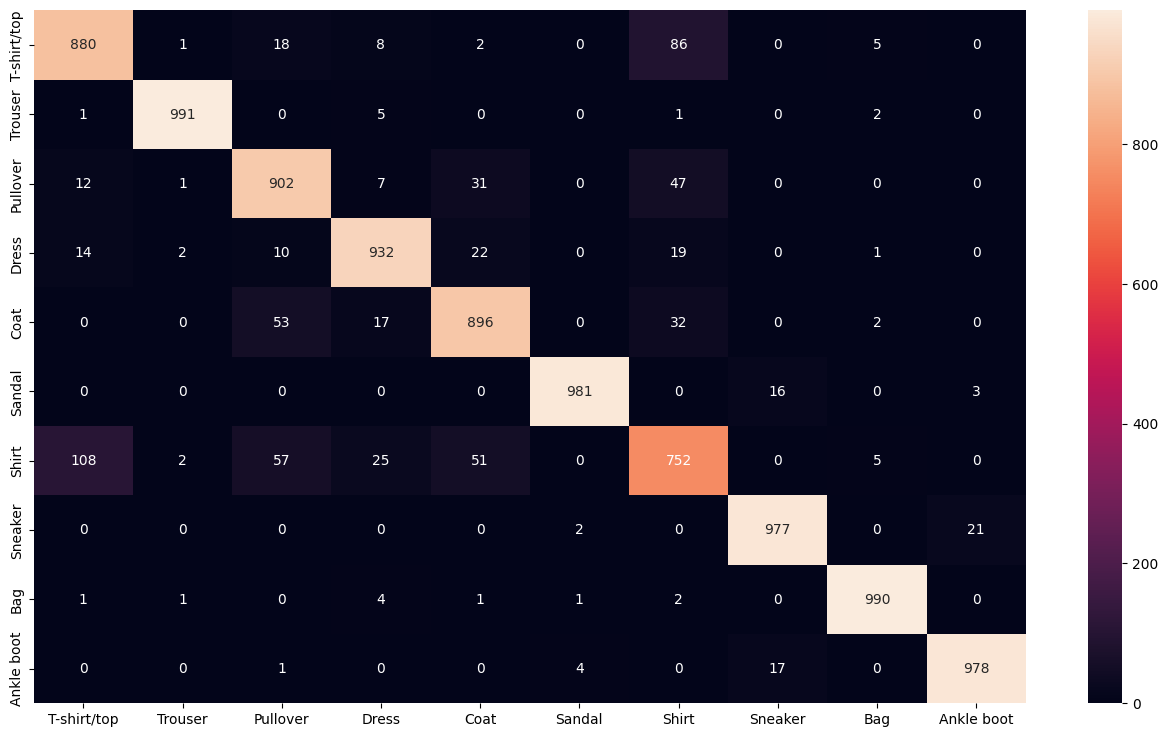

In [38]:
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(16,9))
y_pred_labels = [ np.argmax(label) for label in y_pred ]
cm = confusion_matrix(test_labels, y_pred_labels)

# show cm
sns.heatmap(cm, annot=True, fmt='d',xticklabels=class_names, yticklabels=class_names)

**USING INTEL OPENVINO OPTIMIZATION TO OPTIMIZE THE TRAINED MODEL**

In [39]:
import tensorflow as tf
model = tf.keras.models.load_model('fashion_mnist_cnn_model.h5')
tf.saved_model.save(model,'model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


**CODE TO CONVERT TENSORFLOW KERAS  TRAINED MODEL TO INTEL OPENVINO(IR) FORMAT**

In [42]:
from openvino.inference_engine import IECore, IENetwork
from openvino.runtime import Core
import time
model_xml="saved_model.xml"
model_bin="saved_model.bin"
ie=Core()
model = ie.read_model(model=model_xml,weights=model_bin)
compiled_model = ie.compile_model(model=model, device_name="CPU")
input_layer = compiled_model.input(0)
output_layer = compiled_model.output(0)
infer_request = compiled_model.create_infer_request()
input_tensor = test_images
input_tensor=np.expand_dims(input_tensor,3)
start=time.time()
results = compiled_model.infer_new_request({0: input_tensor})
stop=time.time()
print("Time for inferencing is :",stop-start)
values = next(iter(results.values()))
pred=values


Time for inferencing is : 1.2656183242797852


**here the time taken after converting the Trained Model to OpenVino Format is 1.26ms**

In [43]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

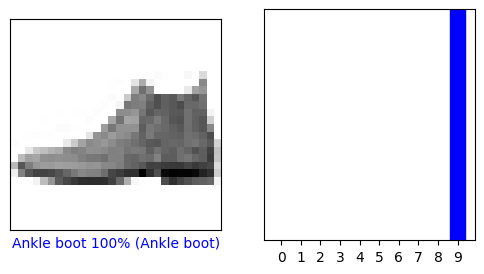

In [51]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred[i],  test_labels)
plt.show()

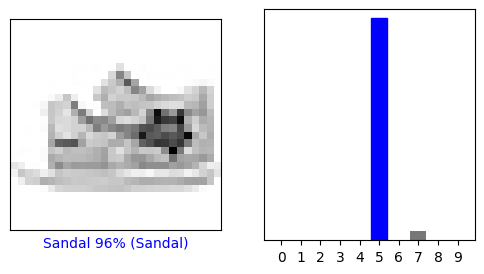

In [50]:
i = 9999
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [ ]:
# So in the conclusion,the Trained model has predicted in 4ms but after converting the trained model to Intel Optimization OpenVino format the model 
#has been Optimized and Predicting output in 1.26 ms.
#So after applying the Intel Optimization to the Trained model the model optimized.